<a href="https://colab.research.google.com/github/devparikh0506/DATA-602/blob/main/week_5/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
%matplotlib inline
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=1, fmt:str=",",
                             cmap=None) -> plt.Figure:
  sns.set(font_scale=fsize)
  fig, ax = plt.subplots(figsize=(5,5))
  ConfusionMatrixDisplay(cm).plot(values_format=fmt, cmap=cmap, ax=ax)
  ax.grid(False)
  return fig

# Problem 1 (20 points) - Logistic Regression
In the example given in class, using the Iris dataset, we predicted the species using only the petal length and width.  Repeat the study adding the sepal width and length (in addition to the petal width and length) as predictors.  Does classification accuracy improve with the additional predictors?

In [87]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
iris = load_iris()
X = iris.data[:] # taking all features
y = iris.target[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [90]:
model.score(X_train, y_train)

0.9833333333333333

Here after adding sepal width and length the modal score for training data improved because of those extra features that are being used by classifier.

In [91]:
model.score(X_test, y_test)

0.9666666666666667

In the test data score no major change is detected.

# Problem 2 (30 points) - Gradient Descent

As shown in class, we can obtain the weights for a logistic regression model through gradient descent.  Our objective is to find a weight matrix $\mathbf{w^\star}$ such that $\nabla J(\mathbf{w^\star})\approx0$.  (You can use $\lVert \nabla J(\mathbf w) \rVert < 0.01$ as a reasonable approximation.)  This is the value of $\mathbf{w}$ that best predicts the correct class for training observations.

For a logistic regression model:

$$
\nabla J(\mathbf{w}) = \begin{bmatrix}
   -\sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_1^{(i)} \\
 \vdots \\
   -\sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_n^{(i)} \\
 \end{bmatrix}
$$

Recall that $\phi(z)$ is the logistic function, i.e., $\phi(z) = (1+e^{-z})^{-1}$.

In the accompanying template, you are given values of predictors $\mathbf{X}$ and targets $\mathbf{y}\in\{0,1\}$.  The classes are linearly separable.
Using the above formula and a learning rate $\eta=0.1$, apply gradient descent to find a value of $\mathbf{w}$ such that
$\nabla J(\mathbf{w}) \approx \mathbf{0}$ (i.e., values for $\mathbf{w}$ that best separate the classes.) Using the code provided in the template, plot the decision boundary to visually demonstrate that the decision boundary separates the two classes.

In [93]:
# Initialization code
# GIVEN: X, y, phi(z), w
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(50, 2, centers=[(-2,-2),(2,2)], random_state=168)
X = StandardScaler().fit_transform(X)
# add the bias term
X = np.c_[np.ones(len(X)), X]

# Initialize weights to zero
w = np.zeros(X.shape[1])

# Logistic function
phi = lambda z: 1/(1+np.exp(-z))

In [96]:
def gradient_descent(X, y, w, learning_rate=0.1, max_iter=10000, threshold=0.01):
    """
    Perform gradient descent to find the optimal weights for a logistic regression model.
    """

    for i in range(max_iter):
        z = np.dot(X, w) # creating arguments for logistic function
        pred = phi(z) # getting predictions
        loss = -np.dot(X.T, (y - pred)) # loss function

        w -= learning_rate * loss

        if np.linalg.norm(loss) < threshold: # accept loss value which is less than threshold
            print(f"Converged after {i+1} iterations.")
            break

    return w

w = gradient_descent(X, y, w)

Converged after 1 iterations.


The below code can be used to plot the prediction boundary, where `w` is the weight vector defined in the above block.

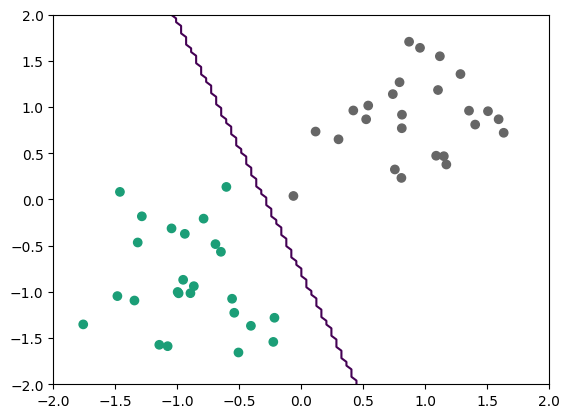

In [97]:
gridsize = 100
gridshape = (gridsize, gridsize)
gridspace = np.linspace(-2, 2, gridsize)
x0m, x1m = np.meshgrid(gridspace, gridspace)
grid = np.c_[np.ones_like(x0m).ravel(), x0m.ravel(), x1m.ravel()]
y_pred = np.apply_along_axis(lambda x: phi(np.dot(w, x)) > 0.5, 1, grid)
plt.contour(x0m.reshape(gridshape),
            x1m.reshape(gridshape),
            y_pred.reshape(gridshape))
plt.scatter(X[:,1], X[:,2], c=y, cmap='Dark2')

# Problem 3 - Binary Classification (50 points)

*Scoring note: parts (a) and (b) are 5 points each, and parts (c) through (f) are 10 points each.*

The OpenML dataset 'credit-g' classifies whether individuals are low credit risks based on 24 predictors [{Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science].

a. Load the 'credit-g' from OpenML and scale the data appropriately.  (A standard scalar will suffice for numeric features.  Categorical feature will need to be one-hot encoded.)

In [158]:
from sklearn.datasets import fetch_openml

In [159]:
d = fetch_openml('credit-g', as_frame=True, version=1)
df = d.data
y = (d.target == 'good').astype(int)

Let's first check data types for each columns

In [160]:
df.dtypes

,0
checking_status,category
duration,int64
credit_history,category
purpose,category
credit_amount,int64
savings_status,category
employment,category
installment_commitment,int64
personal_status,category
other_parties,category


Now let's differntiate b/w categorical and numerical columns

In [161]:
int_cols = df.select_dtypes(include='int64').columns.to_list()
cat_cols = df.select_dtypes(include='category').columns.to_list()

# below code is to verify the column count after differentiation
if not (len(int_cols)+len(cat_cols))==len(df.columns):
  raise Exception("Column count mismatch!")

Let's check for null values

In [162]:
df.isna().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [164]:
preprocessor = ColumnTransformer(
    [
      ('NumericTransformer', StandardScaler(), int_cols),
      ('CategoricalTransformer', OneHotEncoder(handle_unknown="ignore") , cat_cols),
    ]
)

p = Pipeline([('preprocessor', preprocessor)])

X = p.fit_transform(df)

b. Split the scaled data into a test and training data set.  Allocate 80\% of records to the training data set.

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

c. Using the training data set, build a logistic regression classifier to predict the credit risk (the target variable in the OpenML dataset).  The regression classifier should use balanced class weights.

In [166]:
model = LogisticRegression(penalty=None, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

d. Still using the training data set, generate a classification report and confusion matrix, and calculate the $F_1$ score.  (Hint: use see [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), and [`sklearn.metrics.f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [168]:
y_pred = model.predict(X_train) # predict from training dataset

In [169]:
print(classification_report(y_train, y_pred, target_names=['bad', 'good']))

              precision    recall  f1-score   support

         bad       0.58      0.79      0.67       242
        good       0.89      0.76      0.82       558

    accuracy                           0.77       800
   macro avg       0.74      0.77      0.74       800
weighted avg       0.80      0.77      0.77       800



Insights :

- Out of all predection for bad credit score 58% predictions are correct
- Out of all predection for good credit score 89% predictions are correct
- 24% good credit scores classified as bad and 21% bad credit scores classified as good

Using class demo's confusion_matrix_heatmap function

In [188]:
import seaborn as sns
def confusion_matrix_heatmap(cm: np.ndarray, fsize:float=1.0, fmt:str=",",
                             cmap='Blues'):
  sns.set(font_scale=fsize)
  # fig, ax = plt.subplots(figsize=(5,5))
  fig=ConfusionMatrixDisplay(cm, display_labels=['bad', 'good']).plot(values_format=fmt, cmap=cmap)
  plt.grid(False)
  return fig

Confusion matrix:


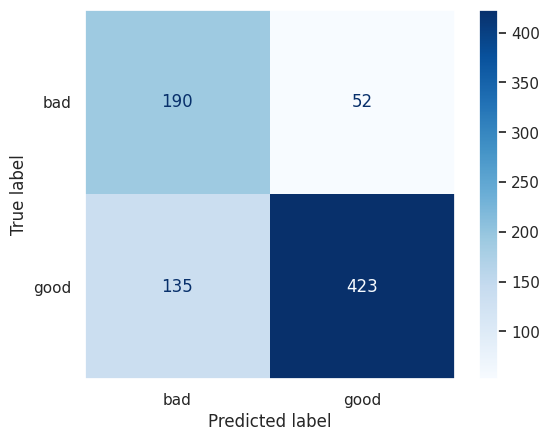

In [189]:
import seaborn as sns
print("Confusion matrix:")
cm=confusion_matrix(y_train, y_pred)
confusion_matrix_heatmap(cm, fmt="1")

In [190]:
print("F1 score:", f1_score(y_train, y_pred))

F1 score: 0.818973862536302


e. Still using the training data set, generate and plot the precision-recall curve.

(Hint: see [`sklearn.metrics.precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).)

In [196]:
from sklearn.metrics import precision_recall_curve

In [197]:
y_scores = model.predict_proba(X_train)[:, 1]

In [198]:
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

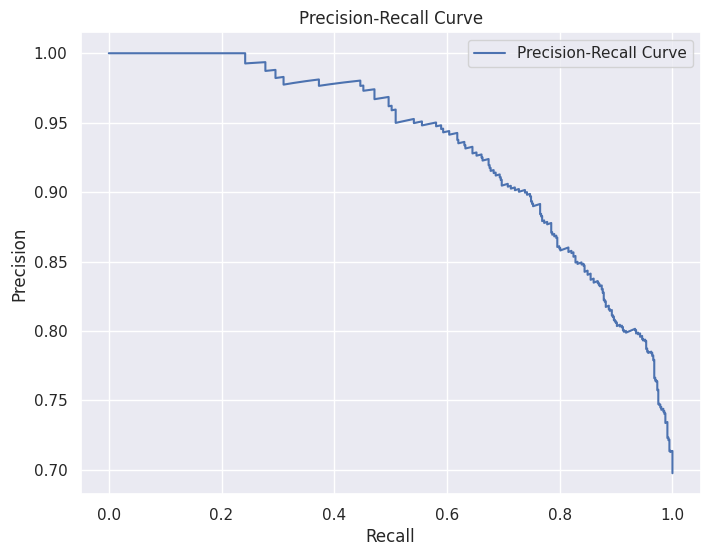

In [199]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

f. Train the model on the complete training data set, and evaluate predictive validity on the test dataset.  Do you obtain a similar $F_1$ score for the test data set.

In [200]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty=None)

In [201]:
y_pred = model.predict(X_test)

In [203]:
print(classification_report(y_test, y_pred, target_names=['bad', 'good']))

              precision    recall  f1-score   support

         bad       0.48      0.66      0.55        58
        good       0.83      0.71      0.77       142

    accuracy                           0.69       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.69      0.71       200



From above data we can see that the scores slight dropped for precision and recall for bad and good classes

Confusion matrix:


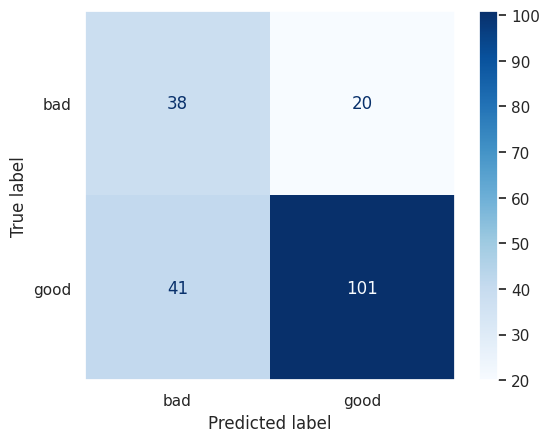

In [206]:
print("Confusion matrix:")
cm=confusion_matrix(y_test, y_pred)
confusion_matrix_heatmap(cm, fmt="1")

In [207]:
print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.7680608365019012


The F1 score for test dataset is slightly less than training dataset which is acceptable as model is not trained on the test data.